# Data preparation

In [35]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt 
import seaborn as sns

sns.set_style("white")

#### Load the data

In [36]:
df_episodes1 = pd.read_csv("../results/play/logs/explain/20240505-10.55.35_play_baseline_original_1000000_13_target_net_episodes.csv", header=None)
# add column names
df_episodes1.columns =['timestamp', 'name', 'seed', 'total_steps', 'episode', 'episode_steps', 'reward', 'distance', 'velocity', 'game_time', 'game_score', 'flag', 'loss', 'epsilon', 'model_id']
#df_episodes1['steps'] = df_episodes1['model_id'].apply(lambda x: int(x.split('_')[-4])/1000 )

In [37]:
df_episodes2 = pd.read_csv("../results/play/logs/explain/20240517-19.10.31_play_B2_2100000_13_target_net_episodes.csv", header=None)
# add column names
df_episodes2.columns =['timestamp', 'name', 'seed', 'total_steps', 'episode', 'episode_steps', 'reward', 'distance', 'velocity', 'game_time', 'game_score', 'flag', 'loss', 'epsilon', 'model_id']
#df_episodes2['steps'] = df_episodes2['model_id'].apply(lambda x: int(x.split('_')[-4])/1000 )

In [38]:
df_episodes3 = pd.read_csv("../results/play/logs/explain/20240505-09.35.45_play_T1_900000_1_target_net_episodes.csv", header=None)
# add column names
df_episodes3.columns =['timestamp', 'name', 'seed', 'total_steps', 'episode', 'episode_steps', 'reward', 'distance', 'velocity', 'game_time', 'game_score', 'flag', 'loss', 'epsilon', 'model_id']
#df_episodes3['steps'] = df_episodes3['model_id'].apply(lambda x: int(x.split('_')[-4])/1000 )

In [39]:
df_episodes4 = pd.read_csv("../results/play/logs/explain/20240505-10.33.18_play_target_T2_800000_1_target_net_episodes.csv", header=None)
# add column names
df_episodes4.columns =['timestamp', 'name', 'seed', 'total_steps', 'episode', 'episode_steps', 'reward', 'distance', 'velocity', 'game_time', 'game_score', 'flag', 'loss', 'epsilon', 'model_id']
#df_episodes4['steps'] = df_episodes4['model_id'].apply(lambda x: int(x.split('_')[-4])/1000 )

In [40]:
df_episodes5 = pd.read_csv("../results/play/logs/explain/20240505-09.20.02_play_C1_1100000_1_target_net_episodes.csv", header=None)
# add column names
df_episodes5.columns =['timestamp', 'name', 'seed', 'total_steps', 'episode', 'episode_steps', 'reward', 'distance', 'velocity', 'game_time', 'game_score', 'flag', 'loss', 'epsilon', 'model_id']
#df_episodes5['steps'] = df_episodes5['model_id'].apply(lambda x: int(x.split('_')[-4])/1000 )

In [41]:
df_episodes6 = pd.read_csv("../results/play/logs/explain/20240505-09.47.49_play_P1_900000_1_target_net_episodes.csv", header=None)
# add column names
df_episodes6.columns =['timestamp', 'name', 'seed', 'total_steps', 'episode', 'episode_steps', 'reward', 'distance', 'velocity', 'game_time', 'game_score', 'flag', 'loss', 'epsilon', 'model_id']
#df_episodes6['steps'] = df_episodes6['model_id'].apply(lambda x: int(x.split('_')[-4])/1000 )

In [42]:
df_episodes7 = pd.read_csv("../results/play/logs/explain/20240505-10.14.57_play_P1_compact_1200000_1_target_net_episodes.csv", header=None)
# add column names
df_episodes7.columns =['timestamp', 'name', 'seed', 'total_steps', 'episode', 'episode_steps', 'reward', 'distance', 'velocity', 'game_time', 'game_score', 'flag', 'loss', 'epsilon', 'model_id']
#df_episodes7['steps'] = df_episodes7['model_id'].apply(lambda x: int(x.split('_')[-4])/1000 )

In [43]:
df_episodes8 = pd.read_csv("../results/play/logs/explain/20240506-18.32.34_play_B1_2300000_13_target_net_episodes.csv", header=None)
# add column names
df_episodes8.columns =['timestamp', 'name', 'seed', 'total_steps', 'episode', 'episode_steps', 'reward', 'distance', 'velocity', 'game_time', 'game_score', 'flag', 'loss', 'epsilon', 'model_id']

In [44]:
df_episodes9 = pd.read_csv("../results/play/logs/explain/20240506-18.43.16_play_P1_2500000_13_target_net_episodes.csv", header=None)
# add column names
df_episodes9.columns =['timestamp', 'name', 'seed', 'total_steps', 'episode', 'episode_steps', 'reward', 'distance', 'velocity', 'game_time', 'game_score', 'flag', 'loss', 'epsilon', 'model_id']

In [45]:
df_episodes10 = pd.read_csv("../results/play/logs/explain/20240507-18.19.20_play_P1_2300000_13_target_net_episodes.csv", header=None)
# add column names
df_episodes10.columns =['timestamp', 'name', 'seed', 'total_steps', 'episode', 'episode_steps', 'reward', 'distance', 'velocity', 'game_time', 'game_score', 'flag', 'loss', 'epsilon', 'model_id']

In [46]:
df_episodes11 = pd.read_csv("../results/play/logs/explain/20240507-18.31.09_play_P1_2700000_13_target_net_episodes.csv", header=None)
# add column names
df_episodes11.columns =['timestamp', 'name', 'seed', 'total_steps', 'episode', 'episode_steps', 'reward', 'distance', 'velocity', 'game_time', 'game_score', 'flag', 'loss', 'epsilon', 'model_id']

In [47]:
df_episodes12 = pd.read_csv("../results/play/logs/explain/20240511-08.38.34_play_T2_ext_ni_2300000_13_target_net_episodes.csv", header=None)
# add column names
df_episodes12.columns =['timestamp', 'name', 'seed', 'total_steps', 'episode', 'episode_steps', 'reward', 'distance', 'velocity', 'game_time', 'game_score', 'flag', 'loss', 'epsilon', 'model_id']

In [48]:
df_episodes13 = pd.read_csv("../results/play/logs/explain/20240511-08.25.54_play_T2_ext_i_2200000_13_target_net_episodes.csv", header=None)
# add column names
df_episodes13.columns =['timestamp', 'name', 'seed', 'total_steps', 'episode', 'episode_steps', 'reward', 'distance', 'velocity', 'game_time', 'game_score', 'flag', 'loss', 'epsilon', 'model_id']

In [49]:
df_episodes14 = pd.read_csv("../results/play/logs/explain/20240512-09.59.31_play_T1_ext_ni_2300000_13_target_net_episodes.csv", header=None)
# add column names
df_episodes14.columns =['timestamp', 'name', 'seed', 'total_steps', 'episode', 'episode_steps', 'reward', 'distance', 'velocity', 'game_time', 'game_score', 'flag', 'loss', 'epsilon', 'model_id']

In [50]:
df_episodes15 = pd.read_csv("../results/play/logs/explain/20240513-15.26.21_play_P1_ext_ni_3100000_13_target_net_episodes.csv", header=None)
# add column names
df_episodes15.columns =['timestamp', 'name', 'seed', 'total_steps', 'episode', 'episode_steps', 'reward', 'distance', 'velocity', 'game_time', 'game_score', 'flag', 'loss', 'epsilon', 'model_id']

In [51]:
df_episodes16 = pd.read_csv("../results/play/logs/explain/20240514-17.03.09_play_T2_ni_2500000_13_target_net_episodes.csv", header=None)
# add column names
df_episodes16.columns =['timestamp', 'name', 'seed', 'total_steps', 'episode', 'episode_steps', 'reward', 'distance', 'velocity', 'game_time', 'game_score', 'flag', 'loss', 'epsilon', 'model_id']

In [52]:
df_episodes17 = pd.read_csv("../results/play/logs/explain/20240516-08.01.08_play_T1-ni_3400000_13_target_net_episodes.csv", header=None)
# add column names
df_episodes17.columns =['timestamp', 'name', 'seed', 'total_steps', 'episode', 'episode_steps', 'reward', 'distance', 'velocity', 'game_time', 'game_score', 'flag', 'loss', 'epsilon', 'model_id']

In [53]:
df_episodes18 = pd.read_csv("../results/play/logs/explain/20240516-19.06.28_play_B1-long_3400000_13_target_net_episodes.csv", header=None)
# add column names
df_episodes18.columns =['timestamp', 'name', 'seed', 'total_steps', 'episode', 'episode_steps', 'reward', 'distance', 'velocity', 'game_time', 'game_score', 'flag', 'loss', 'epsilon', 'model_id']

In [54]:
df_episodes19 = pd.read_csv("../results/play/logs/explain/20240517-08.38.44_play_B2-long_3400000_13_target_net_episodes.csv", header=None)
# add column names
df_episodes19.columns =['timestamp', 'name', 'seed', 'total_steps', 'episode', 'episode_steps', 'reward', 'distance', 'velocity', 'game_time', 'game_score', 'flag', 'loss', 'epsilon', 'model_id']

In [55]:
df_episodes20 = pd.read_csv("../results/play/logs/explain/20240517-09.02.57_play_T2_ext_ni_2300000_13_target_net_rep_episodes.csv", header=None)
# add column names
df_episodes20.columns =['timestamp', 'name', 'seed', 'total_steps', 'episode', 'episode_steps', 'reward', 'distance', 'velocity', 'game_time', 'game_score', 'flag', 'loss', 'epsilon', 'model_id']

In [56]:
df_episodes21 = pd.read_csv("../results/play/logs/explain/20240517-09.21.10_play_T2_ext_ni_2300000_13_target_net_rep2_episodes.csv", header=None)
# add column names
df_episodes21.columns =['timestamp', 'name', 'seed', 'total_steps', 'episode', 'episode_steps', 'reward', 'distance', 'velocity', 'game_time', 'game_score', 'flag', 'loss', 'epsilon', 'model_id']

In [32]:
df_episodes22 = pd.read_csv("../results/play/logs/explain/20240517-11.23.10_play_T1_ext_ni_2300000_13_target_net_rep_episodes.csv", header=None)
# add column names
df_episodes22.columns =['timestamp', 'name', 'seed', 'total_steps', 'episode', 'episode_steps', 'reward', 'distance', 'velocity', 'game_time', 'game_score', 'flag', 'loss', 'epsilon', 'model_id']

In [57]:
concatenated = pd.concat([df_episodes8, df_episodes2, df_episodes10, df_episodes11, df_episodes12, df_episodes13, df_episodes14, df_episodes15, df_episodes16, df_episodes17, df_episodes18, df_episodes19, df_episodes20, df_episodes21, df_episodes22])

<Axes: xlabel='reward', ylabel='model_id'>

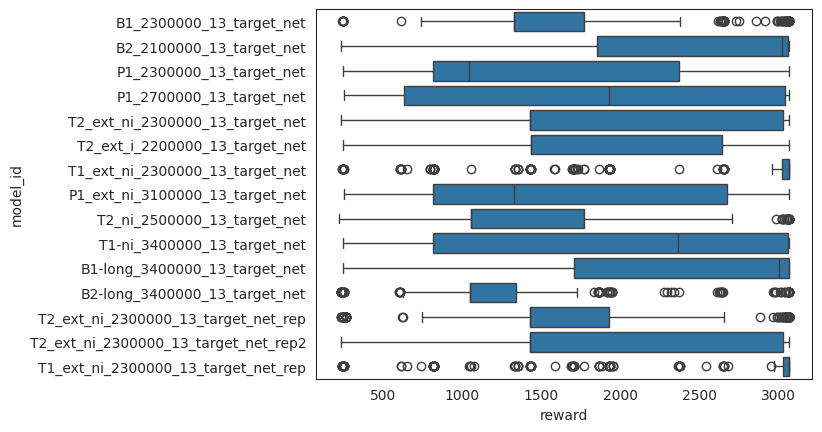

In [58]:
sns.boxplot(x ="reward", y="model_id", data = concatenated)

In [13]:
ax = sns.lineplot(x='steps', y='mean', data=concatenated, hue='dataset').set(title='Mean number of wins per model', xlabel="x100K steps", ylabel="mean number of wins")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [47]:
ax = sns.boxplot(x='episodes', y='mean', data=concatenated, hue='dataset')
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [31]:
fig_reward, ax_flag = plt.subplots(figsize=(6, 6))
sns.regplot(x='seed', y='mean', data=df_episodes1_agg, fit_reg=True, ci=None, ax=ax_flag, label='fast decay')
sns.regplot(x='seed', y='mean', data=df_episodes2_agg, fit_reg=True, ci=None, ax=ax_flag, label='constrainst-forget')
ax_flag.set(ylabel='mean wins', xlabel='seed')
ax_flag.legend()

And plot the average number of flags per 1000 episodes

In [23]:
bins_flags1 = range(0, 100, 10)
df_agg_flags1 = df_episodes1.groupby(pd.cut(df_episodes1['episode'], bins=bins_flags1), observed=True)['flag'].agg(['mean', 'std', 'size'])
bins_flags1 = [*bins_flags1]
bins_flags1.pop(-1)
df_agg_flags1["bin"] = bins_flags1
df_agg_flags1.head(5)

In [ ]:
bins_flags2 = range(0, 100, 10)
df_agg_flags2 = df_episodes2.groupby(pd.cut(df_episodes2['episode'], bins=bins_flags2), observed=True)['flag'].agg(['mean', 'std', 'size'])
bins_flags2 = [*bins_flags2]
bins_flags2.pop(-1)
df_agg_flags2["bin"] = bins_flags2
df_agg_flags2.head(5)

In [ ]:
bins_flags3 = range(0, 100, 10)
df_agg_flags3 = df_episodes3.groupby(pd.cut(df_episodes3['episode'], bins=bins_flags3), observed=True)['flag'].agg(['mean', 'std', 'size'])
bins_flags3 = [*bins_flags3]
bins_flags3.pop(-1)
df_agg_flags3["bin"] = bins_flags3
df_agg_flags3.head(5)

In [ ]:
bins_flags4 = range(0, 100, 10)
df_agg_flags4 = df_episodes4.groupby(pd.cut(df_episodes4['episode'], bins=bins_flags4), observed=True)['flag'].agg(['mean', 'std', 'size'])
bins_flags4 = [*bins_flags4]
bins_flags4.pop(-1)
df_agg_flags4["bin"] = bins_flags4
df_agg_flags4.head(5)

In [ ]:
concatenated_flags = pd.concat([df_agg_flags1.assign(dataset='baseline fast decay'), df_agg_flags2.assign(dataset='constraints-forget'), df_agg_flags3.assign(dataset='target-active'), df_agg_flags4.assign(dataset='target-reactive')])

In [ ]:
ax = sns.lineplot(x='bin', y='mean', data=concatenated_flags, hue='dataset').set(title='Mean number of wins per 10 episodes', xlabel="episode", ylabel="mean number of wins")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

Show epsilon decay over time for both versions to determine if the high-epsilon interval is big enough

In [ ]:
sns.lineplot(x='episode', y='epsilon', data=concatenated, hue='dataset')